Если вы дошли до этого момента, то уже сделали половину пути. Каждую ячейку можно выполнить, нажав Shift+Enter или кнопку Run на панели сверху. Всё, что она выведет будет показано ниже этой ячейки. Также каждая ячейка выводит результат последней строки.

Ваша задача написать код, в местах помеченных "### ваш код здесь" так, чтобы всё работало правильно

In [12]:
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install math

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Could not find a version that satisfies the requirement math (from versions: )
No matching distribution found for math
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
# Подробнее со следующими библиотеками вы познакомитесь на следующих занятиях. 
# Для решения задания потребуется лишь знания чистого python.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

### K-means

Алгоритм k-means применяется для задачи кластеризации. Напомню его основные шаги. Пусть у нас имеется N точек на плоскости ${(x_1,y_1),...,(x_N,y_N)}$
Допустим мы хотим разбить их на k=3 кластера.
1. Выбираем k=3 случайные точки из этого множества. Говорим, что они являются теперь центрами наших кластеров.
2. Для каждой из оставшихся точек смотрим, к какому из центров она ближе и определяем её в этот кластер.
3. У нас получилось разбить точки на 3 кластера. Естественно это не оптимальное разбиение. Найдём новые центры кластеров. Например, если точки ${(x_{i_1}, y_{i_1}),...,(x_{i_n}, y_{i_n})}$ попали в один кластер, то их новый центр будет имеет координаты:
$$x_M=\frac{x_{i_1}+...+x_{i_n}}{n}$$
$$y_M=\frac{y_{i_1}+...+y_{i_n}}{n}$$
4. Переходим к шагу 2 и продолжаем до тех пор, пока кластеры не перестанут меняться.

Сгенерируем искусственно 3 кластера случайных точек.

In [33]:
points = []

# Параметры кластеров
num_clusters = 3
cluster_size = 20

# Центры кластеров
means_x = [1., 1.2, 0.8]
means_y = [0.5, 0.6, 0.5]

# Разброс
std = 0.1

for k in range(num_clusters):
    for i in range(cluster_size):
        x_i = np.random.normal(loc=means_x[k], scale=std)
        y_i = np.random.normal(loc=means_y[k], scale=std)
        points.append((x_i, y_i))

Каждый цвет - отдельный кластер. Но у нас не будет этих цветов, а только координаты точек.

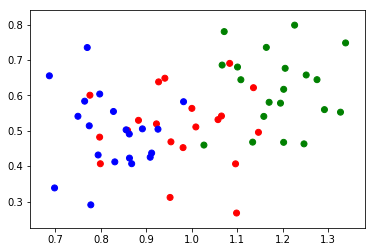

In [34]:
points_x = list(map(lambda x: x[0], points))
points_y = list(map(lambda x: x[1], points))
colors = ['r'] * cluster_size + ['g'] * cluster_size + ['b'] * cluster_size
plt.scatter(x=points_x, y=points_y, c=colors)

In [81]:
# Код алгоритма
from math import hypot
def k_means(points, num_clusters):
    """
    @param points: список из пар координат точек
    @param num_clusters: число кластеров, на которое необходимо поделить

    @return: номера кластеров и их центры
    """
    num_points = len(points)
    # Выбираем начальные центры кластеров (просто первые num_clusters точек)
    centers = points[:num_clusters]
    # В качестве результата будет массив с номерами кластеров для каждой точки
    result = [-1] * num_points
    # Предыдущая копия массива result, чтобы сравнивать, поменялось что-то или нет
    prev_result = None
    
    # Выведем на экран стартовую ситуацию
    print("Входные данные")
    points_x = list(map(lambda x: x[0], points))
    points_y = list(map(lambda x: x[1], points))
    plt.scatter(x=points_x, y=points_y)
    plt.show()
    
    it_num = 1
    # Работаем до тех пор, пока кластеры не перестанут меняться
    while result != prev_result:
        prev_result = list(result)
        # Определяем каждую точку к кластеру
        ### ваш код здесь
        min_ind = 0 #индекс класстера в который мы добавим точку
        for j in range(len(points)):
            min_ind = 0#индекс класстера в который мы добавим точку
            min_zn = 10**9
            for i in range(len(centers)):
                if hypot(centers[i][0] - points[j][0], centers[i][1] - points[j][1]) < min_zn:
                    min_ind = i # проверка нет ли другого класстера для которого расстояние будет меньше
                    min_zn = hypot(centers[i][0] - points[j][0], centers[i][1] - points[j][1])
            result[j] = min_ind   
        # Меняем центры кластеров
        ### ваш код здесь
        sum_clusters = [[0, 0, 0] for i in range(num_clusters)] # список сумм всех класстеров по x и y
        for i in range(len(result)):
            ind = result[i] # индекс класстера
            sum_clusters[ind][0] += points[i][0] 
            sum_clusters[ind][1] += points[i][1]
            sum_clusters[ind][2] += 1
        for i in range(len(centers)):
            centers[i] = (sum_clusters[i][0] / sum_clusters[i][2], sum_clusters[i][1] / sum_clusters[i][2])# изменение центра по x и y
        # Выведем то, что у нас получилось
        print("Итерация №{}".format(it_num))
        it_num += 1
        points_x = list(map(lambda x: x[0], points))
        points_y = list(map(lambda x: x[1], points))    
        plt.scatter(x=points_x, y=points_y, c=result)
        plt.show()
    return result, centers    

Выведем полученный результат

Входные данные


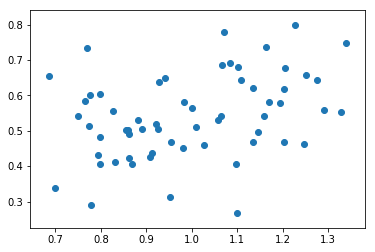

Итерация №1


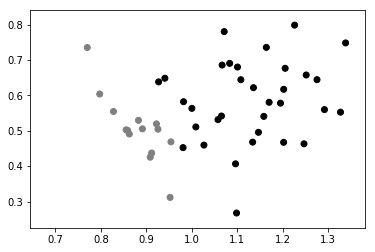

Итерация №2


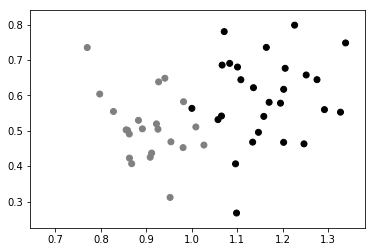

Итерация №3


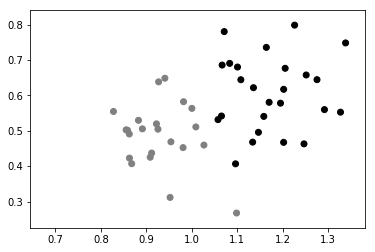

Итерация №4


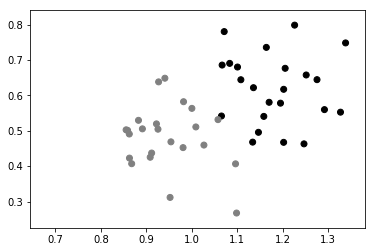

Итерация №5


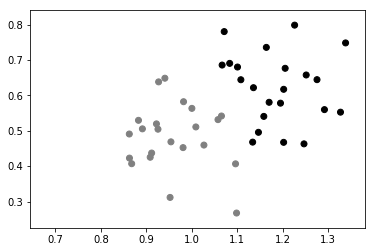

Итерация №6


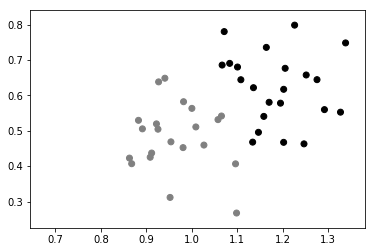

Итерация №7


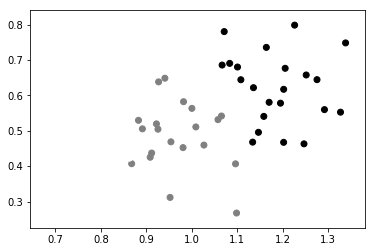

Итерация №8


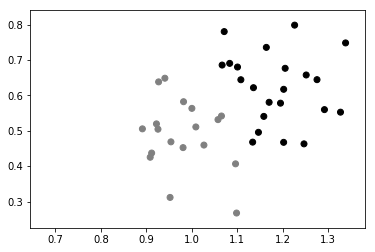

Итерация №9


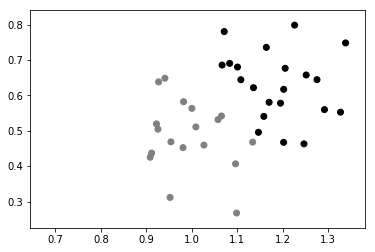

Итерация №10


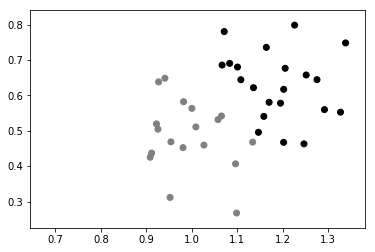

Истинные центры кластеров:
(1.0, 0.5)
(1.2, 0.6)
(0.8, 0.5)
Полученные центры кластеров. Порядок может поменяться, а значения могут немного отличаться:
(1.2, 0.6)
(1.0, 0.5)
(0.8, 0.5)


In [82]:
res, centers = k_means(points, 3)
print("Истинные центры кластеров:")
for i in range(num_clusters):
    print("({0:.1f}, {1:.1f})".format(means_x[i], means_y[i]))
print("Полученные центры кластеров. Порядок может поменяться, а значения могут немного отличаться:")
for i in range(num_clusters):
    print("({0:.1f}, {1:.1f})".format(centers[i][0], centers[i][1]))

### MSE

Напомним формулу для MSE между двумя массивами длины n. Необходимо проверить, насколько сильно они отличаются:
$$MSE(x, y) = \frac{1}{n}((x_1-y_1)^2+...+(x_n-y_n)^2)$$

In [83]:
def mse(x, y):
    """
    @param x, y: массивы одинаковой длины
    @return: число, результат их MSE
    """
    assert len(x) == len(y)
    n = len(x) # количество
    sum = 0
    for i in range(n):
        sum += (x[i] - y[i]) * (x[i] - y[i])
    return sum / n
    ### ваш код здесь

Проверим на простом примере. Должно получиться 5.0:

In [84]:
x = [1, 3, 2, 4, 5, 6]
y = [2, 4, 3, 5, 6, 1]
mse(x, y)

5.0

Теперь проверим на более сложном примере.  Далее в коде ничего изменять не надо, просто посмотрите, как отличаются ошибки алгоритма, который всегда выдаёт 0, а также более продвинутого алгоритма.

В качестве данных у нас картинки с рукописными цифрами из sklearn. Они небольшого размера, но, в принципе, все числа различимы. Это задача классификации с 10 классами (цифры от 0 до 9).

7


<Figure size 432x288 with 0 Axes>

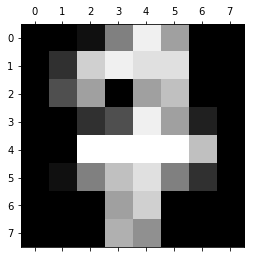

In [85]:
digits = load_digits()
plt.gray()
print(digits.target[17])
plt.matshow(digits.images[17])
plt.show()

Каждая черно-белая картинка это двухмерный массив 8x8, который мы будем использовать в качестве признаков. Первые 1500 цифр возьмём в качестве обучающей выборки, а оставшиеся в качестве тестовой.

In [86]:
X = digits.images.reshape(len(digits.images), -1)
y = digits.target

# Разбиваем на обучающую и тестовую выборки
X_train, y_train = X[:1500], y[:1500]
X_test, y_test = X[1500:], y[1500:]

# Создаём модель
clf = RandomForestClassifier()
# Обучаем модель
clf = clf.fit(X_train, y_train)

In [87]:
# Попробуем посмотреть, правильно ли обучилась модель
print("Истинные значения первых 10 элементов:")
print(y_test[:10])
y_pred = clf.predict(X_test[:10])
print("Предсказанные значения первых 10 элементов:")
print(y_pred)

Истинные значения первых 10 элементов:
[1 7 4 6 3 1 3 9 1 7]
Предсказанные значения первых 10 элементов:
[1 7 4 6 3 1 3 9 1 7]


Вполне неплохо. Выведем результат ошибки MSE на всей тестовой выборке

In [88]:
y_pred = clf.predict(X_test)
print("MSE={}".format(mse(y_test, y_pred)))

MSE=2.356902356902357


А если вместо предсказаний будем всегда выдавать 0

In [89]:
y_pred = [0] * len(y_test)
print("MSE={}".format(mse(y_test, y_pred)))

MSE=28.754208754208754


Результат на лицо. 